<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/Data%20Structure%20-%20Python%20Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Structure - Python Graph**

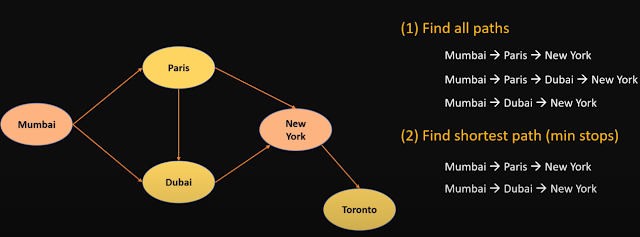

In [49]:
class Graph:

  def __init__(self, edges):
    self.edges = edges

    # Dict to convert the inputs in to pairs. ("Mumbai", "Paris"),  ("Mumbai", "Dubai"), => "Mumbai": ["Paris", "Dubai"]
    self.graph_dict = {} 
    for start, end in self.edges:
      if start in self.graph_dict:
        self.graph_dict[start].append(end)
      else:
        self.graph_dict[start] = [end]


  def get_paths(self, start, end, path=[]):
    path = path + [start]

    if start == end:
      return [path]

    if start not in self.graph_dict:
      return []

    paths = []

    for node in self.graph_dict[start]:
      if node not in path:
        new_paths = self.get_paths(node, end, path)
        for p in new_paths:
          paths.append(p)

    return paths


  def get_shortest_path(self, start, end, path=[]):
    path = path + [start]    

    if start == end:
      return path

    if start not in self.graph_dict:
      return None

    shortest_path = None

    for node in self.graph_dict[start]:
      if node not in path:
        sp = self.get_shortest_path(node, end, path)
        if sp: 
          if shortest_path is None or len(sp) < len(shortest_path):
            shortest_path = sp

    return shortest_path


In [53]:
if __name__ == '__main__':
  routes = [
        ("Mumbai", "Paris"),
        ("Mumbai", "Dubai"),
        ("Paris", "Dubai"),
        ("Paris", "New York"),
        ("Dubai", "New York"),
        ("New York", "Toronto"),
    ]

  route_graph = Graph(routes)

  start = "Mumbai"
  end = "New York"
  print("Paths", route_graph.get_paths(start, end))
  print("Shortest Path", route_graph.get_shortest_path(start, end))
  print("Shortest Path", route_graph.get_shortest_path("Paris", end))

Paths [['Mumbai', 'Paris', 'Dubai', 'New York'], ['Mumbai', 'Paris', 'New York'], ['Mumbai', 'Dubai', 'New York']]
Shortest Path ['Mumbai', 'Paris', 'New York']
Shortest Path ['Paris', 'New York']
